## Surfinpy

#### Tutorial 1 - Bulk Phase diagrams

In this tutorial we learn how to generate a basic bulk phase diagram from DFT energies.  This enables the comparison of the thermodynamic stability of various different bulk phases under different chemical potentials giving valuable insight in to the syntheis of solid phases.  This example will consider a series of bulk phases which can be defined through a reaction scheme across all phases, thus for this example including MgO, H<sub>2</sub>O and CO<sub>2</sub> as reactions and A as a generic product.

\begin{align}
x\text{MgO} + y\text{H}_2\text{O} + z\text{CO}_2 \rightarrow \text{A}
\end{align}

##### Methodology

The system is in equilibrium when the chemical potentials of the reactants and product are equal; <i>i.e.</i> the change in Gibbs free energy is $\delta G_{T,p} = 0$.

\begin{align}
	\delta G_{T,p} = \mu_A - x\mu_{\text{MgO}} - y\mu_{\text{H}_2\text{O}} - z\mu_{\text{CO}_2} = 0
\end{align}

Assuming that H<sub>2</sub>O and CO<sub>2</sub> are gaseous species, $\mu_{CO_2}$ and $\mu_{H_2O}$ can be written as

\begin{align}
	\mu_{\text{H}_2\text{O}} = \mu^0_{\text{H}_2\text{O}} + \Delta\mu_{\text{H}_2\text{O}}
\end{align}
and 
\begin{align}
	\mu_{\text{CO}_2} = \mu^0_{\text{CO}_2} + \Delta\mu_{\text{CO}_2}
\end{align}


The chemical potential $\mu^0_x$ is the partial molar free energy of any reactants or products (x) in their standard states, in this example we assume all solid components can be expressed as

\begin{align}
\mu_{\text{component}} = \mu^0_{\text{component}}
\end{align}

Hence, we can now rearrange the equations to produce;

\begin{align}
	\mu^0_A - x\mu^0_{\text{MgO}} - y\mu^0_{\text{H}_2\text{O}} - z\mu^0_{\text{CO}_2} = y\Delta\mu_{\text{H}_2\text{O}} + z\Delta\mu_{\text{CO}_2}
\end{align}

As $\mu^0_A$  corresponds to the partial molar free energy of product A, we can replace the left side with the Gibbs free energy ($\Delta G_{\text{f}}^0$).

\begin{align}
	\delta G_{T,p} = \Delta G_{\text{f}}^0 - y\Delta\mu_{\text{H}_2\text{O}} - z\Delta\mu_{\text{CO}_2}
\end{align}

At equilibrium $\delta G_{T,p} = 0$, and hence

\begin{align}
	\Delta G_{\text{f}}^0 = y\Delta\mu_{\text{H}_2\text{O}} + z\Delta\mu_{\text{CO}_2}
\end{align}

Thus, we can find the values of $\Delta\mu_{\text{H}_2\text{O}}$ and $\Delta\mu_{\text{CO}_2}$ (or $(p_{\text{H}_2\text{O}})^y$ and $(p_{\text{CO}_2})^z$) when Mg-rich phases are in thermodynamic equilibrium; <i>i.e.</i> they are more or less stable than MgO.  This procedure can then be applied to all phases to identify which is the most stable, provided that the free energy $\Delta G_f^0$ is known for each Mg-rich phase.

The free energy can be calculated using

\begin{align}
\Delta G^{0}_{f} = \sum\Delta G_{f}^{0,\text{products}} - \sum\Delta G_{f}^{0,\text{reactants}}
\end{align}

Where for this tutorial the free energy (G) is equal to the calculated DFT energy (U<sub>0</sub>).


In [1]:
import matplotlib.pyplot as plt
from surfinpy import bulk_mu_vs_mu as bmvm
from surfinpy import utils as ut
from surfinpy import data

The first thing to do is input the data that we have generated from our DFT simulations. The input data needs to be contained within a `surfinpy.data` object. First we have created a `surfinpy.data.ReferenceDataSet` object for the bulk data (reference data), where `cation` is the number of cations, `anion` is the number of anions, `energy` is the DFT energy and `funits` is the number of formula units.

In [2]:
bulk = data.ReferenceDataSet(cation = 1, anion = 1, energy = -92.0, funits = 10)

Next we create the bulk `surfinpy.data.DataSet` objects - one for each surface or "phase". `cation` is the number of cations, `x` is in this case the number of oxygen species (corresponding to the X axis of the phase diagram), `y` is the number of in this case water molecules (corresponding to the Y axis of our phase diagram), `energy` is the DFT energy, `label` is the label for the phase (appears on the phase diagram) and finally `nSpecies` is the number of adsorbin species.


In [3]:
MgO = data.DataSet(cation = 10, x = 0, y = 0, energy = -92.0, label = "Periclase")
Art = data.DataSet(cation = 10, x = 5, y = 20, energy = -468.0, label = "Artinite")
Bru = data.DataSet(cation = 10, x = 0, y = 10, energy = -228.0, label = "Brucite")
Nes = data.DataSet(cation = 10, x = 10, y = 30, energy = -706.0, label = "Nesquehonite")
Mag = data.DataSet(cation = 10, x = 10, y = 0, energy = -310.0, label = "Magnesite")
Lan = data.DataSet(cation = 10, x = 10, y = 50, energy = -972.0, label = "Lansfordite")
Hyd = data.DataSet(cation = 10, x = 8, y = 10, energy = -398.0, label = "Hydromagnesite")

Next we need to create a list of our data. Don't worry about the order, surfinpy will sort that out for you. 

In [4]:
data = [MgO, Art, Bru, Nes,  Mag, Lan, Hyd]

We now need to generate our X and Y axis, or more appropriately, our chemical potential values. These exist in a dictionary. 'Range' corresponds to the range of chemcial potential values to be considered and 'Label' is the axis label.  Additionally, the x and y energy need to be specified.

```
    deltaX = {'Range': Range of Chemical Potential,
              'Label': Species Label}
              
```

In [5]:
deltaX = {'Range': [ -3, 2],  'Label': 'CO_2'}
deltaY = {'Range': [ -3, 2], 'Label': 'H_2O'}
x_energy=-20.53412969
y_energy=-12.83725889

And finally we can generate our plot using these 6 variables of data. 

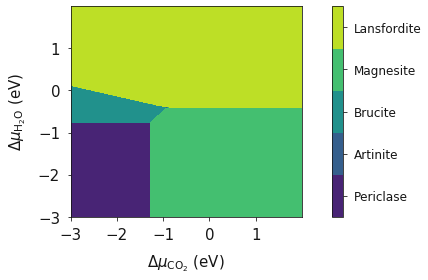

In [6]:
system = bmvm.calculate(data, bulk, deltaX, deltaY, x_energy, y_energy)

ax = system.plot_phase(figsize=(6, 4))
plt.show()